<a href="https://colab.research.google.com/github/alyhussein86/dW09zyvFygXpgTTg/blob/main/P4_MonReader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

### Importing the libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install scikeras

In [3]:
import tensorflow as tf
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
import pandas as pd

In [4]:
tf.__version__

'2.12.0'

In [5]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   fill_mode="nearest")
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/images/training/',
                                                 target_size = (100, 100),
                                                 batch_size = 64,
                                                 class_mode = 'binary'
                                                 )

Found 2392 images belonging to 2 classes.


### Preprocessing the Test set

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  fill_mode="nearest")
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/images/testing/',
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle = False)

Found 597 images belonging to 2 classes.


In [8]:
class_name_train = training_set.class_indices
print(class_name_train)
class_name_test = test_set.class_indices
print(class_name_test)

{'flip': 0, 'notflip': 1}
{'flip': 0, 'notflip': 1}


In [9]:
for image_batch, labels_batch in training_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 100, 100, 3)
(64,)


In [10]:
print(class_name_test.values())

dict_values([0, 1])


## Part 2 - Building the CNN

### Initialising the CNN

In [11]:
cnn = tf.keras.models.Sequential()


In [12]:
cnn.dtype

'float32'

### Step 1 - Convolution

In [13]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=4, activation='relu', input_shape=[100, 100, 3]))


### Step 2 - Pooling

### Adding a second convolutional layer

In [14]:
cnn.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
cnn.add(tf.keras.layers.MaxPool2D((3,3)))
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D((3,3)))
cnn.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D((3,3)))

### Step 3 - Flattening

In [15]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [16]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

### Step 5 - Output Layer

In [17]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [18]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 97, 97, 32)        1568      
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 95, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 9, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 128)         7

## Part 3 - Training the CNN

### Compiling the CNN

In [19]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.binary_crossentropy,
              metrics=[tf.keras.metrics.BinaryAccuracy()])
              # ,tf.keras.metrics.FalseNegatives()])

In [20]:
print(cnn.output_shape)

(None, 1)


In [21]:
print(cnn.input_shape)

(None, 100, 100, 3)


### Training the CNN on the Training set and evaluating it on the Test set

In [22]:
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25, batch_size= 25)

Epoch 1/25
38/38 [==============================] - 867s 23s/step - loss: 0.6940 - binary_accuracy: 0.5100 - val_loss: 0.6912 - val_binary_accuracy: 0.4657
Epoch 2/25
38/38 [==============================] - 44s 1s/step - loss: 0.6763 - binary_accuracy: 0.5581 - val_loss: 0.6386 - val_binary_accuracy: 0.6449
Epoch 3/25
38/38 [==============================] - 46s 1s/step - loss: 0.5793 - binary_accuracy: 0.7186 - val_loss: 0.5082 - val_binary_accuracy: 0.7571
Epoch 4/25
38/38 [==============================] - 45s 1s/step - loss: 0.5382 - binary_accuracy: 0.7212 - val_loss: 0.5485 - val_binary_accuracy: 0.7320
Epoch 5/25
38/38 [==============================] - 44s 1s/step - loss: 0.4958 - binary_accuracy: 0.7692 - val_loss: 0.4403 - val_binary_accuracy: 0.7940
Epoch 6/25
38/38 [==============================] - 44s 1s/step - loss: 0.4029 - binary_accuracy: 0.8282 - val_loss: 0.4937 - val_binary_accuracy: 0.7605
Epoch 7/25
38/38 [==============================] - 48s 1s/step - loss: 0.

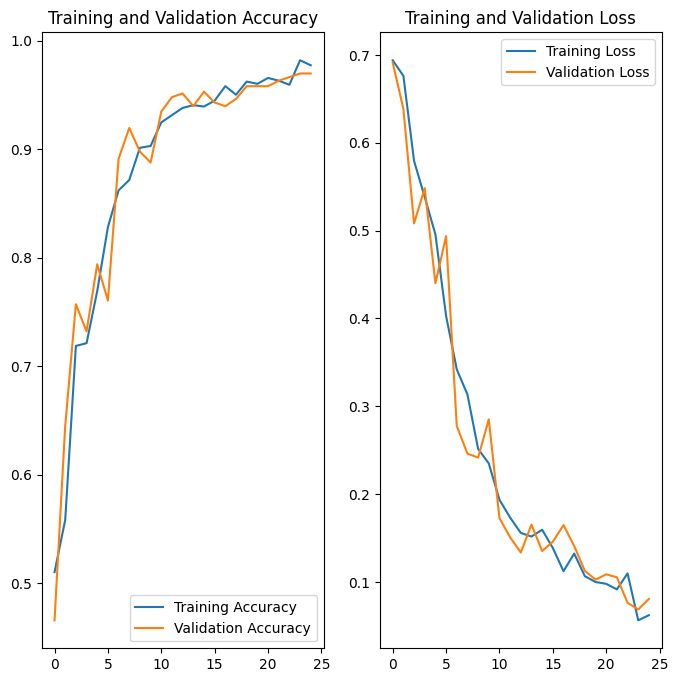

In [23]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Part 4 - Making a single prediction

In [24]:
# test_image = Image.open('/content/drive/MyDrive/images/flip_or_noflip_1.jpg')
test_image =  Image.open('/content/drive/MyDrive/images/flip_or_noflip_2.jpg')
test_image = test_image.resize((100, 100))
test_image = np.expand_dims(test_image, axis = 0)
image_array = np.array(test_image)/255.0

# Reshape the image array to match the input shape expected by the model
# input_array = image_array.reshape(1, 100, 100, 3)  # Assuming a color image with shape (64, 64, 3)
result_i = cnn.predict(image_array)
print(result_i)
training_set.class_indices
if result_i[0][0] >= 0.5:
  prediction = 'Flip'
else:
  prediction = 'NotFlip'

print(prediction)

1/1 [==============================] - 0s 258ms/step
[[0.9850949]]
Flip


In [25]:
cnn.evaluate(test_set)

19/19 [==============================] - 9s 493ms/step - loss: 0.0724 - binary_accuracy: 0.9665


[0.0724262222647667, 0.9664991497993469]

In [26]:
y_pred = cnn.predict(test_set)

19/19 [==============================] - 9s 489ms/step


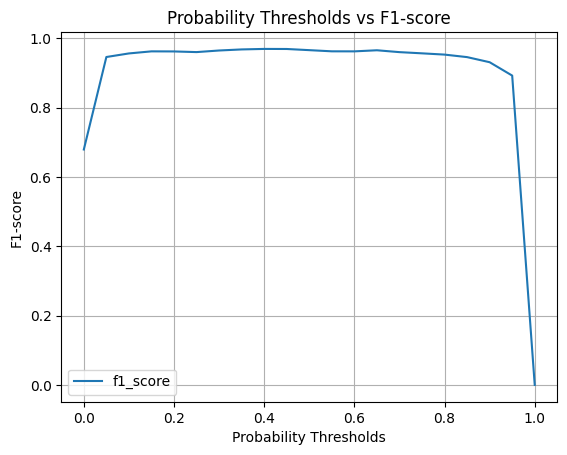

In [27]:
thresholds = np.arange(21)*0.05
f1 = []

for thres in thresholds:
    y_predics = np.where(y_pred > thres, 1, 0)
    f1.append(f1_score(test_set.classes, y_predics))

plt.figure()
plt.plot(thresholds, f1, label='f1_score')
plt.xlabel('Probability Thresholds')
plt.ylabel('F1-score')
plt.title('Probability Thresholds vs F1-score')
plt.legend()
plt.grid()
plt.show()

In [43]:
y_pred.reshape((1,-1))

array([[2.12049001e-09, 2.84453172e-08, 2.92975756e-07, 2.80812103e-13,
        1.46938385e-06, 1.74709886e-01, 3.33783071e-04, 6.91525565e-05,
        7.61401665e-04, 7.44915596e-05, 4.00745448e-05, 1.13422933e-08,
        5.83998772e-05, 2.49045007e-02, 2.53581345e-01, 3.86333257e-11,
        1.50817493e-06, 2.67203377e-05, 6.76402851e-05, 8.45688512e-04,
        6.20197039e-04, 3.34492186e-04, 1.11727363e-11, 2.82222618e-06,
        9.05772790e-09, 7.83833443e-08, 9.40260589e-01, 2.24303669e-08,
        1.86059257e-08, 4.29778856e-06, 6.98721327e-04, 2.31026299e-03,
        1.87443093e-05, 1.85995549e-02, 1.53824082e-03, 5.15250769e-03,
        9.45757339e-09, 4.47476678e-09, 2.32992985e-04, 4.75787143e-09,
        1.57126833e-05, 5.06011838e-06, 1.10578458e-06, 1.33324505e-07,
        2.46186082e-05, 2.65011457e-09, 8.97608210e-10, 5.58819657e-09,
        1.97914032e-05, 3.35807781e-05, 1.98689569e-03, 3.69567424e-04,
        5.47307031e-03, 8.30950975e-01, 2.61910051e-01, 4.756149

In [51]:
test_set.classes.reshape((1,-1))

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 

In [ ]:
param_grid = {
    'filters': [16, 32, 64],
    'kernel_size': [(3, 3), (5, 5)],
    'pool_size': [(2, 2), (3, 3)],
    'dense_units': [64, 128, 256],
    'dropout_rate': [0.2, 0.3, 0.4],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

print(training_set)

# Perform grid search cross-validation
f1_scorer = make_scorer(f1_score)
grid = GridSearchCV(estimator=cnn, param_grid=param_grid, cv=3, scoring=f1_scorer)
grid_result = grid.fit(X=training_set.classes, prediction_labels)

# Step 4: Print the results
print("Best F1 score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, std, param))

In [ ]:
clf = KerasClassifier(cnn, loss="categorical_crossentropy", batch_size=32,
    optimizer='Adam', metrics={'BinaryAccuracy','FalseNegatives'}, validation_split=20.0, epochs=20, class_weight=8)

In [ ]:
clf.fit(training_set, test_set, epochs=20, batch=32, n_jobs=-1)

In [ ]:
result_c = clf.predict(input_array)
print(result_c)
training_set.class_indices
if result_c[0][0] >= 0.5:
  predictions = 'Flip'
else:
  predictions = 'NotFlip'

print(predictions)